In [3]:
import sys
import numpy as np
import cv2 as cv
from PIL import ImageTk, Image
import matplotlib.pyplot as plt

points = [[0,0], [0,0], [0,0], [0,0]] # list that will store the points of the picture the user double-clicks on
count = 0 # counts the user double-clicks
upperLeftPoint = [0,0] # coordinates that will be used to cut out the image
upperRightPoint = [0,0]
lowerLeftPoint = [0,0]
lowerRightPoint = [0,0]


def swapPositions(lst, pos1, pos2): # function that swaps two elements in a list
    first_ele = lst.pop(pos1)    
    second_ele = lst.pop(pos2-1)  
    lst.insert(pos1, second_ele)   
    lst.insert(pos2, first_ele)        
    return lst

lstExample = [1,2,3,4,5]
lstExample = swapPositions(lstExample, 1, 2)
print(lstExample)

[1, 3, 2, 4, 5]


In [5]:
""" The following function takes the 4 points and sorts them in the list in this order:
  1.Upper left point
  2.Upper right point
  3.Lower left point
  4.Lower right point 
  Then, it updates the global variables, so that we can extract the window."""

def sortPoints(points):
    global upperLeftPoint 
    global upperRightPoint 
    global lowerLeftPoint 
    global lowerRightPoint 
    for i in range(len(points) - 1):
        if(points[i][1] > points[3][1]):
            points = swapPositions(points, i, 3)
    for i in range(len(points) - 2):
        if(points[i][1] > points[2][1]):
            points = swapPositions(points, i, 2)
    if(points[0][0] > points[1][0]):
        points = swapPositions(points, 0, 1)
    if(points[2][0] > points[3][0]):
        points = swapPositions(points, 2, 3)
    upperLeftPoint = points[0]
    upperRightPoint = points[1]
    lowerLeftPoint = points[2]
    lowerRightPoint = points[3]
    
pointsExample = [[100,200],[110,400],[560,450],[550,220]]
sortPoints(pointsExample)
print("Upper Left: {}.".format(upperLeftPoint))
print("Upper Right: {}.".format(upperRightPoint))
print("Lower Left: {}.".format(lowerLeftPoint))
print("Lower Right: {}.".format(lowerRightPoint))

Upper Left: [100, 200].
Upper Right: [550, 220].
Lower Left: [110, 400].
Lower Right: [560, 450].


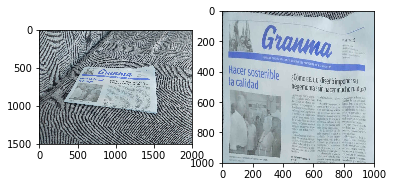

In [12]:
img = cv.imread("granma.jpg")

def draw_circle(event, x, y, flags, param): # draws a small circle where the user double-clicks. Also, uses the
    global count, points                    # count global variable in order to store the coordinates in the list.
    if(event == cv.EVENT_LBUTTONDBLCLK):
        cv.circle(img, (x,y), 10, (0,0,255), -1)
        points[count][0] = x
        points[count][1] = y
        count += 1

cv.namedWindow("Newspaper")
cv.setMouseCallback("Newspaper", draw_circle)

# loop that keeps the window open until either the user clicks 4 points, or click on exit.

while(1):                       
    cv.imshow("Newspaper", img)
    key = cv.waitKey(33)
    if(key == 27):
        break
    elif(count == 4):
        break

cv.destroyAllWindows()

sortPoints(points)
x1 = upperLeftPoint[0]
y1 = upperLeftPoint[1]
x2 = upperRightPoint[0]
y2 = upperRightPoint[1]
x3 = lowerLeftPoint[0]
y3 = lowerLeftPoint[1]
x4 = lowerRightPoint[0]
y4 = lowerRightPoint[1]
x1after = 0
y1after = 0
x2after = 999
y2after = 0
x3after = 0
y3after = 999
x4after = 999
y4after = 999

A = np.array([[x1,y1,1,0,0,0,-x1*x1after,-y1*x1after], 
    [0,0,0,x1,y1,1,-x1*y1after,-y1*y1after],
    [x2,y2,1,0,0,0,-x2*x2after,-y2*x2after],
    [0,0,0,x2,y2,1,-x2*y2after,-y2*y2after],
    [x3,y3,1,0,0,0,-x3*x3after,-y3*x3after],
    [0,0,0,x3,y3,1,-x3*y3after,-y3*y3after],
    [x4,y4,1,0,0,0,-x4*x4after,-y4*x4after],
    [0,0,0,x4,y4,1,-x4*y4after,-y4*y4after]])

B = np.array([[x1after],
              [y1after],
              [x2after],
              [y2after],
              [x3after],
              [y3after],
              [x4after],
              [y4after]])

x = np.linalg.solve(A, B)
a1 , a2, a3, a4, a5, a6, a7, a8 = x[0][0], x[1][0], x[2][0], x[3][0], x[4][0], x[5][0], x[6][0], x[7][0]

T = np.array([[a1,a2,a3],
	      [a4,a5,a6],
	      [a7,a8,1]])         

res = cv.warpPerspective(img, T, (1000,1000))
outputImage = Image.fromarray(res)
plt.subplot(121)
plt.imshow(img, cmap = "gray")
plt.subplot(122)
plt.imshow(outputImage, cmap = "gray")
plt.show()

          INPUT IMAGE             OUTPUT IMAGE